<a href="https://colab.research.google.com/github/Klussendorf/AnalyticalReportExample/blob/master/StatisticalDataMining_Python_Week4_Tree1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

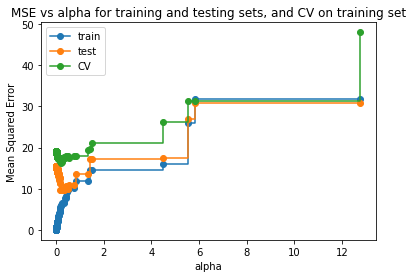

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

from sklearn.datasets import load_boston
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load data
# For details for this data, see 
# https://scikit-learn.org/stable/datasets/index.html#boston-house-prices-dataset
boston = load_boston()

X = boston.data
y = boston.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

df_dtr = DecisionTreeRegressor()
df_dtr = df_dtr.fit(X_train, y_train)

path = df_dtr.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas
ccp_alphas = ccp_alphas[:-1] #remove max value of alpha
regrs = []
for ccp_alpha in ccp_alphas:
    regr = DecisionTreeRegressor(random_state=2, ccp_alpha=ccp_alpha)
    regr.fit(X_train, y_train)
    regrs.append(regr)
    
# Calculate MSEs
# The first two lines are equivalent to 
# train_scores = [((y_train - regr.predict(X_train))**2).mean() for regr in regrs]
# test_scores = [((y_test - regr.predict(X_test))**2).mean() for regr in regrs]
train_scores = [mean_squared_error(y_train, regr.predict(X_train)) for regr in regrs]
test_scores =  [mean_squared_error(y_test, regr.predict(X_test)) for regr in regrs]
cv_scores = [-cross_val_score(regr, X_train, y_train, cv=10, scoring='neg_mean_squared_error').mean() for regr in regrs]

# MSE vs alpha plot
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("Mean Squared Error")
ax.set_title("MSE vs alpha for training and testing sets, and CV on training set")
ax.plot(ccp_alphas, train_scores, marker = 'o', label = "train", drawstyle = "steps-post")
ax.plot(ccp_alphas, test_scores, marker = 'o', label = "test", drawstyle = "steps-post")
ax.plot(ccp_alphas, cv_scores, marker = 'o', label = "CV", drawstyle = "steps-post")
ax.legend()
plt.show()
